In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the print() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

21.815029325108966 164.01687986023313
-80.02073304041794 -103.37304776646714
76.70151137923241 169.63949713071116
9.025099977152593 50.3527457475422
-89.033967327108 127.35407447057321
76.03689263495343 140.38446827463872
-21.142925669956497 -52.4722360518455
87.35821370478627 152.8612025010047
11.388681436062058 -107.24630806187808
30.353856479412997 -20.55386442123043
-55.342503937073054 -9.337339240293403
-62.72171241712188 166.84330048241804
70.17473435331758 -138.54474878582323
-22.05243275746473 47.53328703125666
89.56407373763543 -97.97557028361223
50.362801955680936 129.74510103545555
2.747455945429806 -74.89491928511747
-36.928466566767675 81.59167523680827
-19.09854365092295 37.22535986128247
-56.60100942979105 -116.173941994458
-23.496031310807354 5.863211628083093
42.62142105700468 157.52723283986438
-48.81528631472798 72.03370562504648
-83.94080173604515 -106.17163176567456
51.09660047168538 56.78981277959437
37.52134140319873 -41.46152606641806
-36.89155048203847 -29.8259

-19.80057994384316 67.02045266703183
52.48228311205625 -13.987012223559987
82.56571248805182 52.542529046428626
33.850082226389716 -110.00141440412474
24.747841404233952 -68.62218588652021
22.007230707502416 -167.18455654610045
19.908842703077028 -65.93014052152684
10.257876447471446 -57.83647532066682
16.040369733828925 -1.4462706624116493
-77.32036082638024 71.9115001461328
-83.4048743666717 56.47682131448957
-84.1335836087631 13.427349253506975
-43.664231916332895 133.1477191302988
-31.782819653306447 -22.584605037225344
1.4842072062198355 171.3952467001164
-27.688875657818393 -74.50697301981401
-83.46654775990426 50.65110576251115
-33.4310749143846 -82.32619253639771
60.51830800014764 44.2593272054626
-41.897780388873436 96.0188448520089
-6.86930989432912 -4.362777337004957
-10.112295184710447 -115.26404951065199
-84.5713624954255 -74.8992822011181
-59.27452076668674 71.96291794109123
-19.9249953811009 75.7980879521939
25.646212614374917 18.031761639934217
72.04654268096505 83.6640

In [5]:
from citipy import citipy

In [6]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

598

In [49]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [8]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0b10d7ecfaa59b138e52388d7eb940ac


In [9]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [10]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | butaritari
Processing Record 2 of Set 1 | punta arenas
Processing Record 3 of Set 1 | pevek
Processing Record 4 of Set 1 | bandarbeyla
Processing Record 5 of Set 1 | new norfolk
Processing Record 6 of Set 1 | nizhneyansk
City not found. Skipping...
Processing Record 7 of Set 1 | panorama
Processing Record 8 of Set 1 | chokurdakh
Processing Record 9 of Set 1 | coahuayana
Processing Record 10 of Set 1 | los llanos de aridane
Processing Record 11 of Set 1 | cape town
Processing Record 12 of Set 1 | bluff
Processing Record 13 of Set 1 | aklavik
Processing Record 14 of Set 1 | ikongo
Processing Record 15 of Set 1 | qaanaaq
Processing Record 16 of Set 1 | zavitinsk
Processing Record 17 of Set 1 | rivera
Processing Record 18 of Set 1 | bambous virieux
Processing Record 19 of Set 1 | quelimane
Processing Record 20 of Set 1 | rikitea
Processing Record 21 of Set 1 | henties bay
Processing Record 22 of Set 

Processing Record 35 of Set 4 | tura
Processing Record 36 of Set 4 | shimoda
Processing Record 37 of Set 4 | barawe
City not found. Skipping...
Processing Record 38 of Set 4 | puerto baquerizo moreno
Processing Record 39 of Set 4 | coihueco
Processing Record 40 of Set 4 | castro
Processing Record 41 of Set 4 | campbell river
Processing Record 42 of Set 4 | maghama
City not found. Skipping...
Processing Record 43 of Set 4 | nouakchott
Processing Record 44 of Set 4 | ukiah
Processing Record 45 of Set 4 | tateyama
Processing Record 46 of Set 4 | margate
Processing Record 47 of Set 4 | fortuna
Processing Record 48 of Set 4 | fredericton
Processing Record 49 of Set 4 | sheridan
Processing Record 50 of Set 4 | edd
Processing Record 1 of Set 5 | asau
Processing Record 2 of Set 5 | langsa
Processing Record 3 of Set 5 | tuktoyaktuk
Processing Record 4 of Set 5 | carnarvon
Processing Record 5 of Set 5 | anloga
Processing Record 6 of Set 5 | lokosovo
Processing Record 7 of Set 5 | kupang
Processi

Processing Record 24 of Set 8 | bosobolo
Processing Record 25 of Set 8 | luderitz
Processing Record 26 of Set 8 | tecpan
Processing Record 27 of Set 8 | roald
Processing Record 28 of Set 8 | ati
Processing Record 29 of Set 8 | southbridge
Processing Record 30 of Set 8 | fowa
Processing Record 31 of Set 8 | pilar
Processing Record 32 of Set 8 | talnakh
Processing Record 33 of Set 8 | yerbogachen
Processing Record 34 of Set 8 | pokhara
Processing Record 35 of Set 8 | collie
Processing Record 36 of Set 8 | upernavik
Processing Record 37 of Set 8 | kasongo-lunda
Processing Record 38 of Set 8 | paita
Processing Record 39 of Set 8 | kerteh
City not found. Skipping...
Processing Record 40 of Set 8 | junction city
Processing Record 41 of Set 8 | grand gaube
Processing Record 42 of Set 8 | sao gabriel da cachoeira
Processing Record 43 of Set 8 | susanville
Processing Record 44 of Set 8 | kholodnyy
Processing Record 45 of Set 8 | homer
Processing Record 46 of Set 8 | ambovombe
Processing Record 

Processing Record 14 of Set 12 | betioky
Processing Record 15 of Set 12 | shenjiamen
Processing Record 16 of Set 12 | paradwip
City not found. Skipping...
Processing Record 17 of Set 12 | tambun
Processing Record 18 of Set 12 | illapel
Processing Record 19 of Set 12 | oranjestad
Processing Record 20 of Set 12 | kargopol
Processing Record 21 of Set 12 | swan hill
Processing Record 22 of Set 12 | revelstoke
Processing Record 23 of Set 12 | mujiayingzi
Processing Record 24 of Set 12 | kushmurun
Processing Record 25 of Set 12 | shamgarh
Processing Record 26 of Set 12 | saint-francois
Processing Record 27 of Set 12 | leiyang
Processing Record 28 of Set 12 | verkhoyansk
Processing Record 29 of Set 12 | dzaoudzi
Processing Record 30 of Set 12 | qasigiannguit
Processing Record 31 of Set 12 | grindavik
Processing Record 32 of Set 12 | bolzano
Processing Record 33 of Set 12 | ancud
Processing Record 34 of Set 12 | stawell
Processing Record 35 of Set 12 | padang
Processing Record 36 of Set 12 | k

In [20]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Butaritari,3.0707,172.7902,81.01,79,99,15.79,KI,2022-08-10 17:29:50
1,Punta Arenas,-53.1500,-70.9167,46.51,71,0,10.36,CL,2022-08-10 17:29:50
2,Pevek,69.7008,170.3133,34.93,97,63,2.19,RU,2022-08-10 17:29:50
3,Bandarbeyla,9.4942,50.8122,77.88,81,83,32.57,SO,2022-08-10 17:29:51
4,New Norfolk,-42.7826,147.0587,40.91,75,91,3.22,AU,2022-08-10 17:29:51
5,Panorama,40.5878,23.0315,84.90,38,40,12.66,GR,2022-08-10 17:29:52
6,Chokurdakh,70.6333,147.9167,53.22,69,0,9.15,RU,2022-08-10 17:29:52
7,Coahuayana,18.7333,-103.6833,91.08,55,77,1.79,MX,2022-08-10 17:29:54
8,Los Llanos De Aridane,28.6585,-17.9182,72.12,82,75,11.50,ES,2022-08-10 17:29:55
9,Cape Town,-33.9258,18.4232,58.10,92,75,12.66,ZA,2022-08-10 17:29:55


In [21]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Butaritari,KI,2022-08-10 17:29:50,3.0707,172.7902,81.01,79,99,15.79
1,Punta Arenas,CL,2022-08-10 17:29:50,-53.1500,-70.9167,46.51,71,0,10.36
2,Pevek,RU,2022-08-10 17:29:50,69.7008,170.3133,34.93,97,63,2.19
3,Bandarbeyla,SO,2022-08-10 17:29:51,9.4942,50.8122,77.88,81,83,32.57
4,New Norfolk,AU,2022-08-10 17:29:51,-42.7826,147.0587,40.91,75,91,3.22
5,Panorama,GR,2022-08-10 17:29:52,40.5878,23.0315,84.90,38,40,12.66
6,Chokurdakh,RU,2022-08-10 17:29:52,70.6333,147.9167,53.22,69,0,9.15
7,Coahuayana,MX,2022-08-10 17:29:54,18.7333,-103.6833,91.08,55,77,1.79
8,Los Llanos De Aridane,ES,2022-08-10 17:29:55,28.6585,-17.9182,72.12,82,75,11.50
9,Cape Town,ZA,2022-08-10 17:29:55,-33.9258,18.4232,58.10,92,75,12.66


In [22]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [23]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

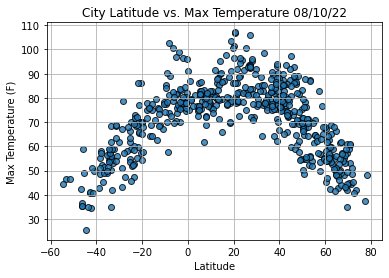

In [24]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

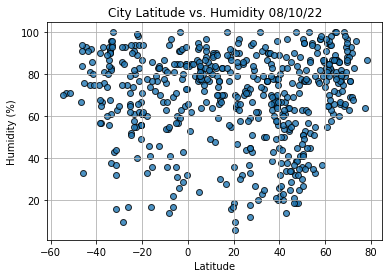

In [25]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

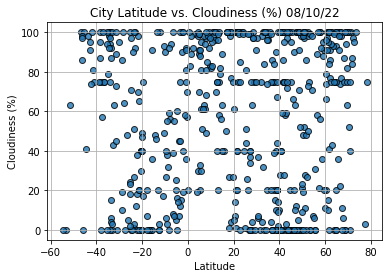

In [26]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

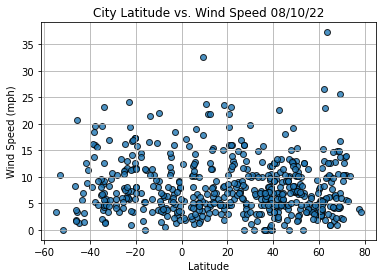

In [27]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [32]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [35]:
index13 = city_data_df.loc[13]
index13

City                      Qaanaaq
Country                        GL
Date          2022-08-10 17:29:57
Lat                        77.484
Lng                      -69.3632
Max Temp                    37.53
Humidity                       64
Cloudiness                      3
Wind Speed                   4.03
Name: 13, dtype: object

In [36]:
city_data_df["Lat"] >= 0

0       True
1      False
2       True
3       True
4      False
       ...  
544     True
545    False
546     True
547    False
548     True
Name: Lat, Length: 549, dtype: bool

In [37]:
city_data_df.loc[(city_data_df["Lat"] >= 0)]

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Butaritari,KI,2022-08-10 17:29:50,3.0707,172.7902,81.01,79,99,15.79
2,Pevek,RU,2022-08-10 17:29:50,69.7008,170.3133,34.93,97,63,2.19
3,Bandarbeyla,SO,2022-08-10 17:29:51,9.4942,50.8122,77.88,81,83,32.57
5,Panorama,GR,2022-08-10 17:29:52,40.5878,23.0315,84.90,38,40,12.66
6,Chokurdakh,RU,2022-08-10 17:29:52,70.6333,147.9167,53.22,69,0,9.15
...,...,...,...,...,...,...,...,...,...
541,Kungurtug,RU,2022-08-10 17:48:34,50.5994,97.5228,48.49,95,100,1.72
542,Sapa,PH,2022-08-10 17:48:35,5.1544,120.3241,81.43,79,91,4.16
544,Saint Anthony,US,2022-08-10 17:45:07,45.0205,-93.2180,84.88,55,75,10.36
546,North Bend,US,2022-08-10 17:45:07,43.4065,-124.2243,72.91,83,75,4.61


In [38]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()


,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Butaritari,KI,2022-08-10 17:29:50,3.0707,172.7902,81.01,79,99,15.79
2,Pevek,RU,2022-08-10 17:29:50,69.7008,170.3133,34.93,97,63,2.19
3,Bandarbeyla,SO,2022-08-10 17:29:51,9.4942,50.8122,77.88,81,83,32.57
5,Panorama,GR,2022-08-10 17:29:52,40.5878,23.0315,84.90,38,40,12.66
6,Chokurdakh,RU,2022-08-10 17:29:52,70.6333,147.9167,53.22,69,0,9.15


In [39]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

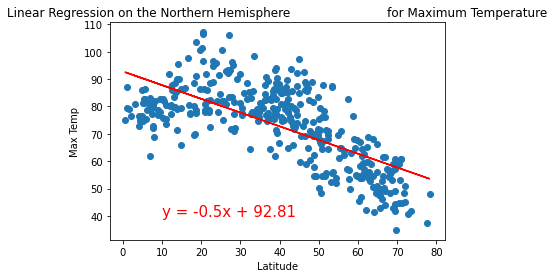

In [40]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

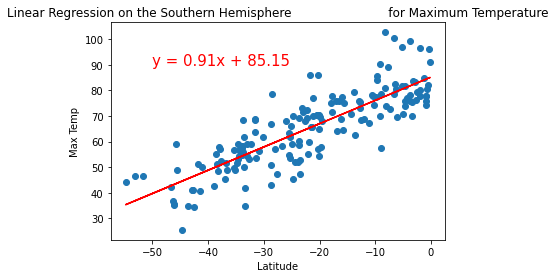

In [41]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

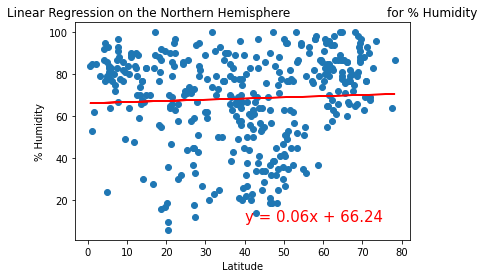

In [42]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

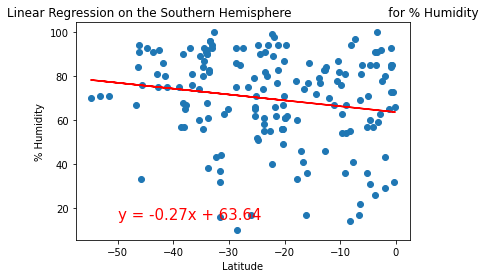

In [43]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

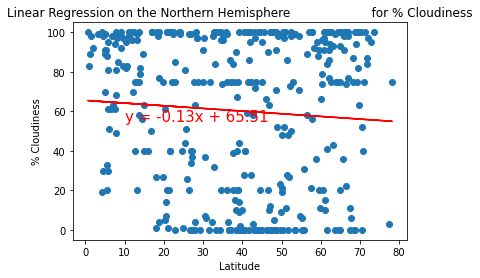

In [45]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function
plot_linear_regression(x_values, y_values,
                   'Linear Regression on the Northern Hemisphere \
                    for % Cloudiness', '% Cloudiness',(10,55))

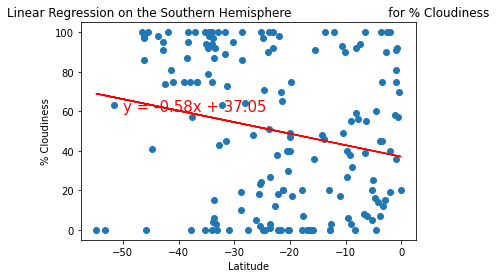

In [46]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

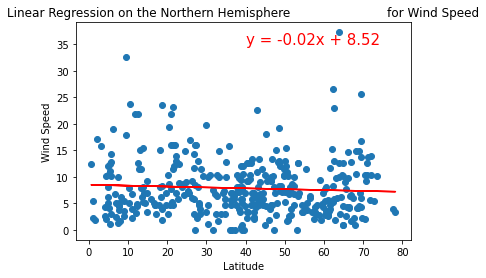

In [47]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

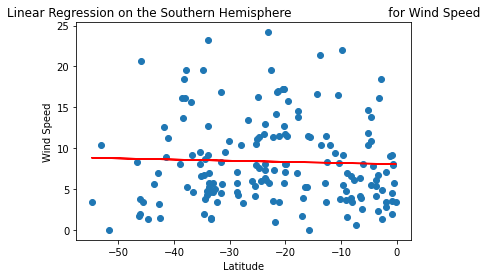

In [48]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))